# K-Nearest Neighbors (KNN)
El algoritmo K-Nearest Neighbors (KNN) es un método de clasificación supervisada utilizado para clasificar puntos de datos basados en la proximidad a otros puntos de datos en el espacio de características. El principio fundamental detrás de KNN es que los puntos que son similares estarán cerca unos de otros.

<img src="../imgs/knn_gif.gif" style="max-width: 60%;">

El algoritmo KNN no tiene un proceso de entrenamiento explícito. En cambio, almacena todos los datos de entrenamiento y los utiliza durante la fase de predicción.
Para predecir la clase de un nuevo punto de datos, el algoritmo calcula la distancia entre el nuevo punto y todos los puntos de datos de entrenamiento.
Selecciona los 𝑘 puntos de datos más cercanos (vecinos) al nuevo punto.
Asigna la clase más común entre estos 𝑘 vecinos al nuevo punto de datos.

<img src="../imgs/knn_selector.webp">

La distancia comúnmente utilizada en KNN es la distancia euclidiana, aunque se pueden usar otras medidas de distancia.

<img src="../imgs/distances.webp">


### Modelo

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Cargar el conjunto de datos
iris = load_iris()
# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Agregar la columna de especies
df['species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
X = df.drop('species', axis=1)
y = df['species']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Crear y entrenar el modelo KNN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

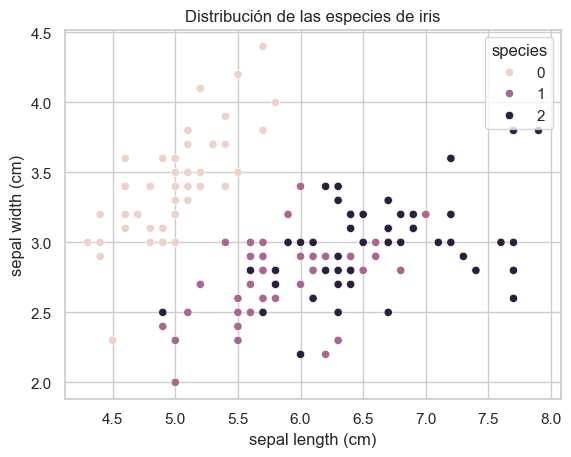

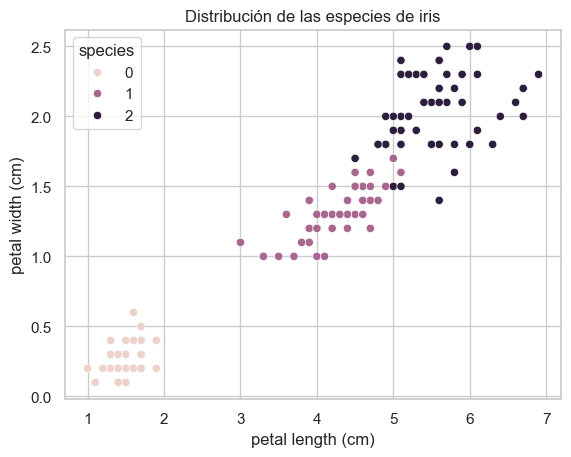

In [19]:
# Hacemos un par de gráficos para visualizar los resultados
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión de las características sepal_length y sepal_width
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df)
plt.title('Distribución de las especies de iris')
plt.show()

# Gráfico de dispersión de las características petal_length y petal_width
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df)
plt.title('Distribución de las especies de iris')
plt.show()

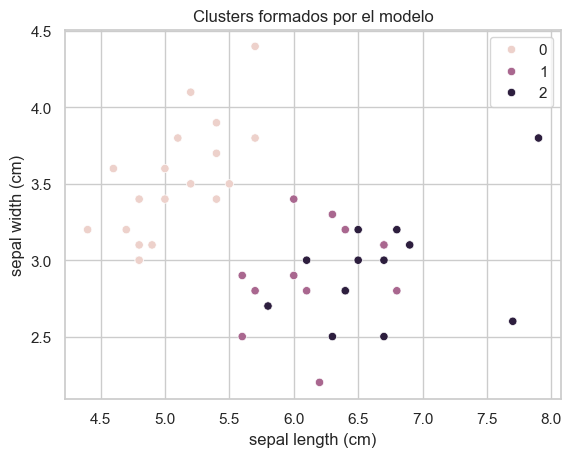

In [22]:
# Visualizamos los clusters formados por el modelo (predicciones)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue=y_pred, data=X_test)
plt.title('Clusters formados por el modelo')
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


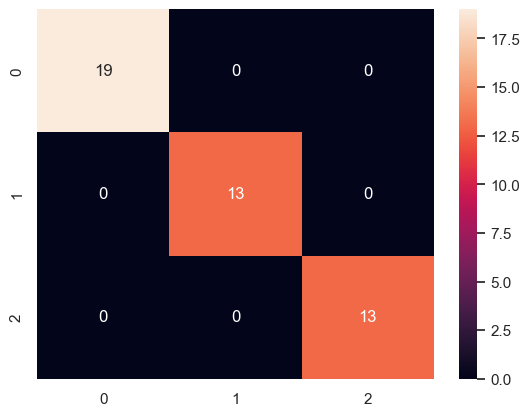

In [27]:
# verificamos las métricas de evaluación
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1:', f1_score(y_test, y_pred, average='weighted'))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

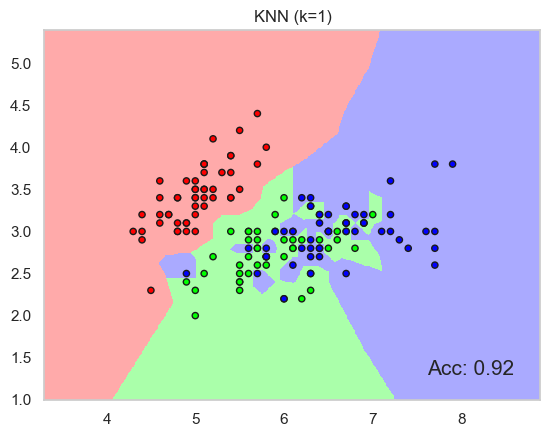

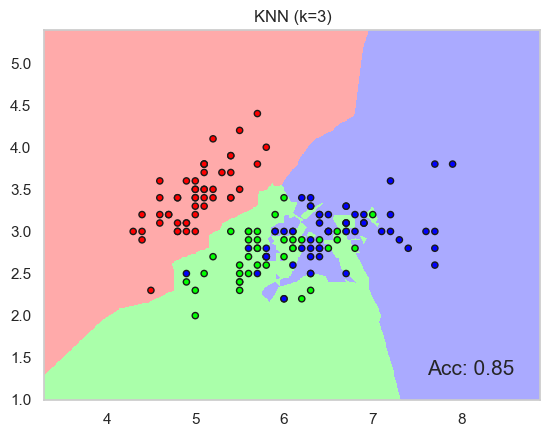

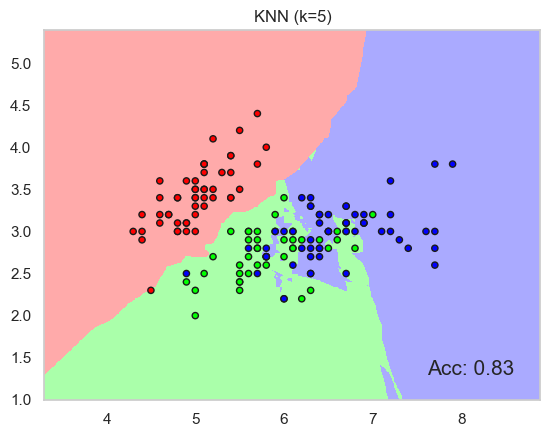

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usamos solo las dos primeras características
y = iris.target

# Crear una función para graficar los límites de decisión
def plot_decision_boundaries(X, y, n_neighbors):
    h = .01  # paso de la malla en la gráfica

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    for n in n_neighbors:
        # Crear una instancia de KNN y ajustar los datos
        clf = neighbors.KNeighborsClassifier(n, weights='uniform')
        clf.fit(X, y)

        # Crear malla de puntos para graficar
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Graficar también los puntos de entrenamiento
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f"KNN (k={n})")

        # Verificamos las métricas de evaluación
        y_pred = clf.predict(X)
        acc = accuracy_score(y, y_pred)
        plt.text(xx.max() - .3, yy.min() + .3, ('Acc: %.2f' % acc).lstrip('0'),
                 size=15, horizontalalignment='right')

# Veamos los límites de decisión para k=1, 3 y 5
plot_decision_boundaries(X, y, [1, 3, 5])
plt.show()
